### 7.3 Схема независимых испытаний
- биномиальное распределение
- <span style='color:red'>отрицательное биномиальное распределение</span>
- теорема Пуассона
- <span style='color:red'>теорема Муавра-Лапласа</span>

In [41]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

Пусть $(\Omega_0, \mathfrak A_0, P_0)$ - вероятностное пространство, где $\Omega_0 = {w_{0_1}, ..., w_{0_s}}, \; 2 \leq s < \infty, \; p_0(\omega_{0_i})=p_i, \sum\limits_{i=1}^{s} p_i = 1, \\
\mathfrak A_0 \text{ - все поднможество} \;\Omega_0, 
P(A)= \sum\limits_{i: \omega_{0_i} \in A}{}p(\omega_{0_i})
$
Пусть $
\Omega = \Omega_0^n = 
\{{\omega = < \omega_{0_{i_1}},..., \omega_{0_{i_n}}>, \; \forall n \;\; \omega_{0_{i_n}} \in \Omega_0}\}
$, т.е. n-кратное повторение $\Omega_0 \Rightarrow \Omega = s^n$ - элементарных исходов, $\mathfrak A_\sigma$ - все подмножества $\Omega$

***Независимость испытаний***
$P(\omega) = P_0(< \omega_{0_{i_1}},..., \omega_{0_{i_n}}>) = P_0(\omega_{0_{i_1}})\cdot...\cdot P(\omega_{0_{i_n}})$

***Биномиальная схема независимых испытаний или схема Бернули***
$\text{Пусть } s=2, \; \Omega_0= \text{{У, Н}}, P(У) = p, P(H) = q, \text{ т.е. } p+q = 1. \\
\text{Далее зафиксируем n}, \; \xi_n: \Omega \rightarrow \Re \text{, где: } \\
k = \xi_n(\omega) \text{ - количество } \omega_{0_i} = У \\
n - k = \xi_n(\omega) \text{ - количество } \omega_{0_i} = Н \\
\Rightarrow P(\omega) = P(\{\omega_{0_i}: \xi_n(\omega_{0_i}) = k \})=C_n^k p^k q^{n-k}$

Случайная величина имеет распределение Бернулии (биномиальное распределение), если $P(\xi_n = k) = C_n^k p^k q^{n-k}, \; k =\overline{1, n}$ - это говорит нам о том, что в n испытаниях произошло ровно k успехов.
$$ 1 = \sum\limits_{k=0}^n P(\xi_n=k)=\sum\limits_{k=0}^n C_n^k p^k q^{n-k} = (p+q)^n = 1$$

In [1]:
k, n = 2, 5

def fact(n):     
    if n == 0:
        return 1
    return n*fact(n-1)
print(f'{k}! =', fact(k))

def c(n, k):
    return int(fact(n)/(fact(k)*fact(n-k)))
print(f'C({n}, {k})=', c(n, k))

def f(n, k, p):
    return c(n, k)*p**k*(1-p)**(n-k)
p = 0.5
print(f'Вероятность того, что монетка из {n} испытаний выпадет {k} раз(а) орлом равна', f(n, k, p))

2! = 2
C(5, 2)= 10
Вероятность того, что монетка из 5 испытаний выпадет 2 раз(а) орлом равна 0.3125


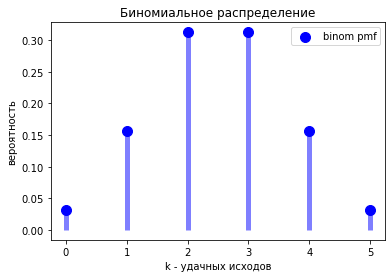

In [4]:
n, p = 5, 0.5
binom = sts.binom(n, p)
xx = np.arange(n+1)
distr = binom.pmf(xx)
plt.scatter(xx, distr, c='b', s=100, label='binom pmf')
plt.vlines(xx, 0, distr, alpha=.5, lw=5, colors='b')

plt.xlabel('k - удачных исходов')
plt.ylabel('вероятность')
plt.title('Биномиальное распределение')
plt.legend()
plt.show()

***Рассмотрим различные ассимптотики***
$
P(\xi_n=k) \xrightarrow[n \rightarrow \infty]{} \; ?$
$P(\xi_n=k) = C_n^kp^kq^{n-k} = P(n, k, p)$
- $n \rightarrow \infty, k=fix, p=fix \Rightarrow P(\xi_n = k) \rightarrow 0$
- $n \rightarrow \infty, k=fix, p \rightarrow 0 \text{ - ассимптотика Пуассона}$ 
- $n \rightarrow \infty, k \rightarrow \infty, p=fix \text{ - ассимптотика Муавра-Лапласа}$

***Асимптотика Пуассона***

***Теорема Пуасона*** $\text{Пусть } k=fix, \; n \rightarrow \infty, \;p=p(n) \rightarrow 0: np \rightarrow \lambda, \text{ где } 0<\lambda<\infty, \lambda=const \Rightarrow \\ 
\Rightarrow C_n^kp^kq^{n-k} \rightarrow \frac{\lambda^k}{k!}e^{-\lambda} \;\forall k=fix \Rightarrow lim_{n\to\infty}P(\xi_n=k)=\frac{\lambda^k}{k!}e^{-\lambda}, \;\forall k=fix$

***Определение***
Распределение, задаваемое функцией $p(x)=\frac{\lambda^k}{k!}e^{-\lambda}, \text{ где } k=\overline{1,\infty}$ называется распределением Пуассона, с параметром $\lambda>0$

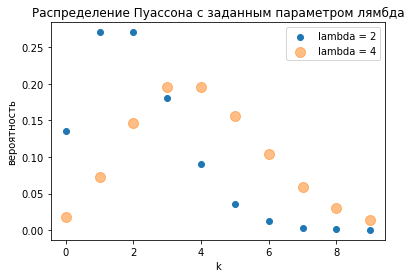

In [6]:
# 1
n = 10
kk = np.arange(0, n)
def p(x, l=6):    
    return (l**x/fact(x))*np.exp(-l)
lmbd = 2
distr = [p(k, lmbd) for k in kk]
plt.scatter(kk, distr, label=f'lambda = {lmbd}')

# 2 using scipy methods
lmbd = 4
distr = sts.poisson(lmbd).pmf(kk)
plt.scatter(kk, distr, label=f'lambda = {lmbd}', alpha = 0.5, s=100)

plt.xlabel('k')
plt.ylabel('вероятность')
plt.title('Распределение Пуассона с заданным параметром лямбда')
plt.legend()

***Ассимптотика Муавра-Лапласа***

$n \rightarrow \infty, k \rightarrow \infty, p=fix$

При при больших количествах испытаний по схеме Бернулли, где $p=fix$ число $k \approx np$

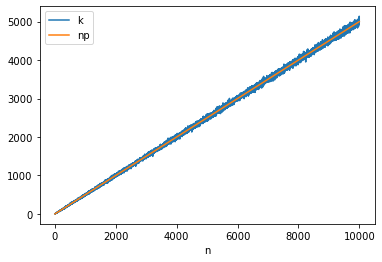

In [64]:
# nn = np.arange(1, 40)
nn = np.arange(1, int(1e4)) # кол-во испытаний
p = 0.5
q = 1-p
kk = []                      
nps = []
xx = []

for n in nn:
    
    k = sts.bernoulli(p=p).rvs(n).sum() # число успехов в каждой контретной выборке
    x = (k - n*p)/np.sqrt(n*p*q)
    kk.append(k)
    nps.append(n*p)
    xx.append(x)

kk = np.array(kk)
nps = np.array(nps)
xx = np.array(xx)

plt.plot(np.arange(kk.size), kk, label='k')
plt.plot(np.arange(nps.size), nps, label='np')

plt.xlabel('n')
plt.legend()

$ \text{Рассмотрим дисперсию одного испытания при броске монеты } \\
 D_\xi(x)= p(1-p)^2 + q(0-p)^2=pq^2+qp^2=pq(p+q)=pq \\ \text{ Теперь рассмотрим серию испытаний. Т.к. испытания независимые, т.е. } \\ cov_{\xi_i,\xi_j}=0 \; \forall i \neq j \text{, то } D_{\sum_{\xi_n}} = \sum D_{\xi_n} \Rightarrow D_{n\xi(x)} = npq \\
\text{Отцентрируем слуайную величину и изменим размерность} \\ \text{(уменьшним рассеянность) - введем случайную величину }\xi_n \Rightarrow x_n = \frac{k-np}{\sqrt{npq}}$


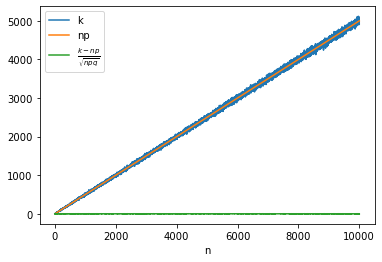

In [158]:
# nn = np.arange(1, 40)
nn = np.arange(1, int(1e4)) # кол-во испытаний
p = 0.5
q = 1-p
kk = []                      
nps = []
xx = []

for n in nn:
    
    k = sts.bernoulli(p=p).rvs(n).sum() # число успехов в каждой контретной выборке
    x = (k - n*p)/np.sqrt(n*p*q)
    kk.append(k)
    nps.append(n*p)
    xx.append(x)

zz = list(range(1, len(kk)+1))

plt.plot(zz, kk, label='k')
plt.plot(zz, nps, label='np')
plt.plot(zz, xx, label=r'$\frac{k-np}{\sqrt{npq}}$')

plt.xlabel('n')
plt.legend()

***Локальная теорема Лапласа***

$ \text{Пусть } n \rightarrow \infty, \;p=fix, \left| \frac{k-np}{\sqrt{npq}} \right| \leq C \Rightarrow P(\xi_n<k)$